In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.basemap import Basemap, shiftgrid, interp, addcyclic
import scipy.io
from scipy.interpolate import griddata
import datetime
#from pylab import *
import numpy.ma as ma
from glob import glob
#from matplotlib.mlab import griddata
#from pylab import *

#import osgeo
#import gdal

from numpy import nan


import string
from scipy import stats
import matplotlib as mpl
import scipy.ndimage as ndimage
from netCDF4 import Dataset
from scipy import signal

import datetime as dt




In [8]:
#ftp://ftp-icdc.cen.uni-hamburg.de/ora_ip/

data1=Dataset('AMOC_ORAS4_1958-2013.nc',"r")    
lat=data1.variables['lat'][:]
depth=data1.variables['depth'][:]
zomsfatl=data1.variables['zomsfatl'][:,:]

In [9]:
zomsfatl.shape

(672, 42, 292, 1)

In [10]:
depth.shape

(42,)

In [11]:
lat.shape

(292, 1)

In [12]:
lat_g,depth_g=np.meshgrid(lat,depth)

In [13]:
lat_g.shape

(42, 292)

In [14]:
depth_g.shape

(42, 292)

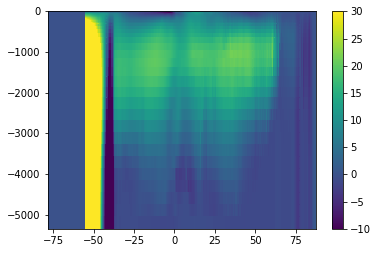

In [23]:
plt.pcolor(lat_g,-depth_g,zomsfatl[100,:,:,0],vmin=-10,vmax=30)
plt.colorbar()

In [30]:
# Trend 2010 - 2017
# Trend 1958 - 2013
num_months = 12 
num_years = 56 
nx = 42
ny = 292
var_sst = np.zeros((num_years, num_months, nx, ny))
for k in range(672):
    year=np.int(k/12.)
    m=np.int(k-year*12)
    #print(k,m,y+1990)
    var_sst[year,m]=zomsfatl[k,:,:,0]
    
    
start_year_sst = 1958
num_years_sst = 56
start_month = 0
start_year_trend = 1958 #1994#2004
num_years_trend = num_years_sst #10#7
iyearstart = start_year_trend - start_year_sst
trend_sst, trend_m_sst, sig_a_sst, sig_a_m_sst, r_a_sst, r_a_m_sst, int_a_sst, int_a_m_sst = cal_trend(iyearstart, num_years_trend, start_month, num_months, nx, ny, var_sst)
#trend_m_CICE_masked=ma.masked_where(var0_CICE_3D[0]>1e10, trend_m_CICE)
#trend_m_CICE_masked=ma.masked_where(var0_CICE_3D_m_masked<0.15, trend_m_CICE)

0
1
2
3
4
5
6
7
8
9
10
11


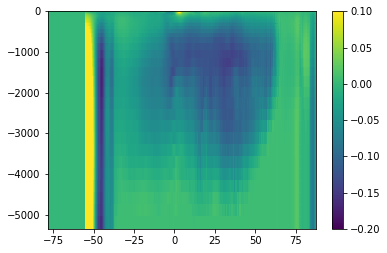

In [37]:
plt.pcolor(lat_g,-depth_g,trend_sst,vmin=-0.2,vmax=0.1)
plt.colorbar()

In [24]:
##############################################################################################
# Function to calculate the spatial mean of one field and write the trends in .dat files
# returns
#          ---> trend_time[year]
#          ---> trend_space[x,y]
##############################################################################################

def cal_trend(start_year, num_years, start_month, num_months, nx, ny, var):

# Initialize
        x = nx
        y = ny

##################
# Maps of trends
##################

# Monthly averaged
        num_years
        years = np.arange(num_years)
        trend_ym = np.zeros((num_months, x, y))
        sig_a_ym = np.zeros((num_months, x, y))
        r_a_ym = np.zeros((num_months, x, y))
        int_a_ym = np.zeros((num_months, x, y))

        for month in range(num_months):
                print (month)
                var_y = np.mean(var,1)
                for i in range(x):
                        for j in range(y):
                                slope, intercept, r, prob, stderr = stats.linregress(years,var[start_year:start_year+num_years, month, i, j])
                                trend_ym[month, i, j] = slope
                                sig_a_ym[month, i, j] = 100*(1-prob)
                                r_a_ym[month, i, j] = r
                                int_a_ym[month, i, j] = intercept

# Yearly averaged
        years = np.arange(num_years)
        trend = np.zeros((x, y))
        sig_a = np.zeros((x, y))
        r_a = np.zeros((x, y))
        int_a = np.zeros((x, y))

        for i in range(x):
                for j in range(y):
                        slope, intercept, r, prob, stderr = stats.linregress(years,var_y[start_year:start_year+num_years, i, j])
                        trend[i, j] = slope
                        sig_a[i, j] = 100*(1-prob)
                        r_a[i, j] = r
                        int_a[i, j] = intercept

        return trend, trend_ym, sig_a, sig_a_ym, r_a, r_a_ym, int_a, int_a_ym


